In [1]:
#EEE 485: Statsitical Leaning and Data Analytics Term Project
#Logistic Regression Algorithm Implementation

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

In [7]:
file_path = "UCI_Credit_Card.csv"

In [9]:
data = pd.read_csv(file_path)

In [11]:
print(data)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [13]:
column_names = data.columns

In [15]:
print(column_names)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


In [17]:
ones = np.ones(30000)

X0 = np.reshape(ones,(30000,1))
X1 =  data['LIMIT_BAL'].values #
X2 =  data['SEX'].values
X3 =  data['EDUCATION'].values
X4 =  data['MARRIAGE'].values
X5 =  data['AGE'].values       #
X6 =  data['PAY_0'].values
X7 =  data['PAY_2'].values
X8 =  data['PAY_3'].values
X9 =  data['PAY_4'].values
X10 = data['PAY_5'].values
X11 = data['PAY_6'].values
X12 = data['BILL_AMT1'].values #
X13 = data['BILL_AMT2'].values #
X14 = data['BILL_AMT3'].values #
X15 = data['BILL_AMT4'].values #
X16 = data['BILL_AMT5'].values #
X17 = data['BILL_AMT6'].values #
X18 = data['PAY_AMT1'].values  #
X19 = data['PAY_AMT2'].values  #
X20 = data['PAY_AMT3'].values  #
X21 = data['PAY_AMT4'].values  #
X22 = data['PAY_AMT5'].values  #
X23 = data['PAY_AMT6'].values  #

main_design_matrix = np.column_stack((X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23))
main_response_vector = data['default.payment.next.month'].values

In [23]:
def normalize(predictor):
    mean_value = np.mean(predictor)
    std_variance = np.std(predictor)
    normalized = (predictor - mean_value)/std_variance
    return normalized

In [45]:
def matrix_generator(ones,main_design_matrix,main_response_vector):
    
    #number of row
    n = int(input("Enter row size: "))
    
    #whether to take whole main matrix or not
    matrix_bool = int(input("All features?(Yes:1/No:0): "))
    
    ones = np.ones(n)
    X0 = np.reshape(ones,(n,1))
    X = X0

    if matrix_bool != 1:
        
        p = input("Enter predictor numbers: ") 
        index_lst = p.split(",")
        int_lst  = [int(num) for num in index_lst]
        print(int_lst)
        Beta = np.zeros((len(int_lst)+1,1))
        
        for i in range(len(int_lst)):
        
            normalized_colum = normalize(main_design_matrix[0:n,int_lst[i]])
            X = np.column_stack((X,normalized_colum))
        
    else:
        
        int_lst = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
        print(int_lst)
        Beta = np.zeros((len(int_lst)+1,1))
        
        for i in range(len(int_lst)):
            
            normalized_colum = normalize(main_design_matrix[0:n,int_lst[i]])
            X = np.column_stack((X,normalized_colum))
    
    Y = main_response_vector[0:n]
    Y = np.reshape(Y,(n,1))
    

    print(Y.shape)
    print(X.shape)
    print(Beta.shape)
    
    return Y,X,Beta

In [47]:
Y,X,Beta = matrix_generator(ones,main_design_matrix,main_response_vector)

Enter row size:  30000
All features?(Yes:1/No:0):  1


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
(30000, 1)
(30000, 24)
(24, 1)


In [41]:
n = 30000
p = 24
ones = np.ones(n)
ones = np.reshape(ones,(n,1))

X_exact = np.column_stack((ones,normalize(X1),normalize(X2),  normalize(X3), normalize(X4), normalize(X5), normalize(X6),\
                          normalize(X7),normalize(X8),  normalize(X9), normalize(X10),normalize(X11),normalize(X12),\
                          normalize(X13),normalize(X14),normalize(X15),normalize(X16),normalize(X17),\
                          normalize(X18),normalize(X19),normalize(X20),normalize(X21),normalize(X22),\
                          normalize(X23)))

print(X_exact.shape)

(30000, 24)


In [49]:
print(X_exact == X)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [43]:
Y_exact = data['default.payment.next.month'].values
Y_exact = np.reshape(Y,(30000,1))
print(Y_exact.shape)

(30000, 1)


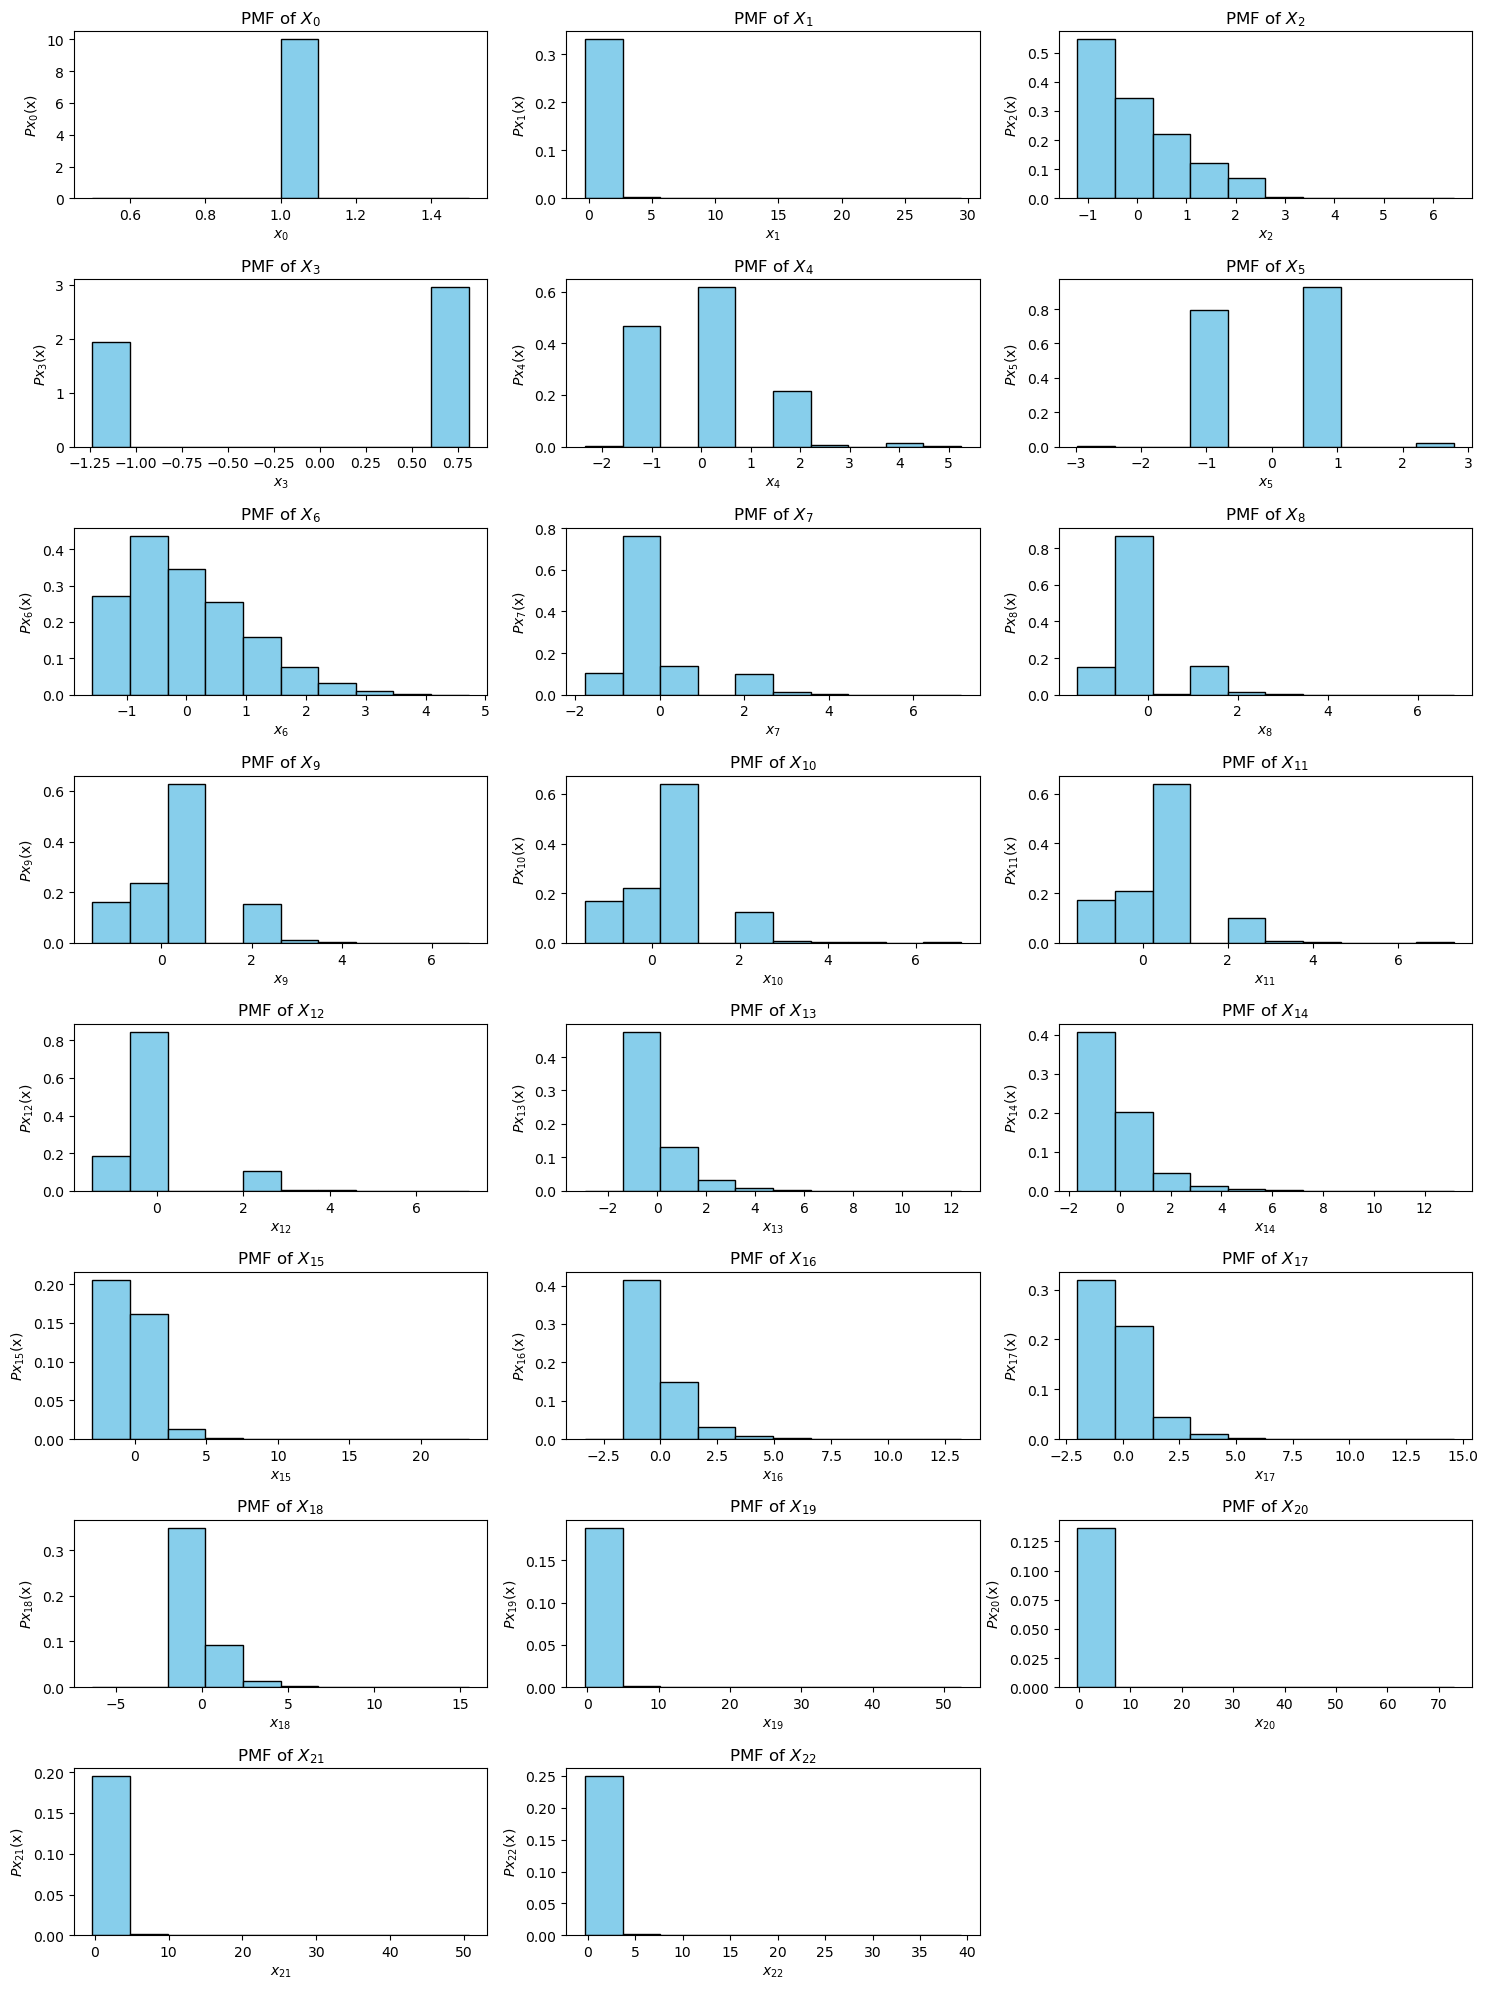

In [341]:
#Distributions of Predictors
# Determine the layout of subplots
num_rows = 8
num_cols = 3

# Create subplots with histograms
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axs array to make it easier to iterate
axs = axs.flatten()

# Plot histograms for each predictor
for i in range(0,23):
    axs[i].hist(X[:,i], bins=10, density = True, color='skyblue', edgecolor='black')
    axs[i].set_title(f'PMF of $X_{{{i}}}$')
    axs[i].set_xlabel(f'$x_{{{i}}}$')
    axs[i].set_ylabel(f'$Px_{{{i}}}$(x)')

for j in range(23, num_rows*num_cols):
    axs[j].axis('off')

plt.tight_layout()

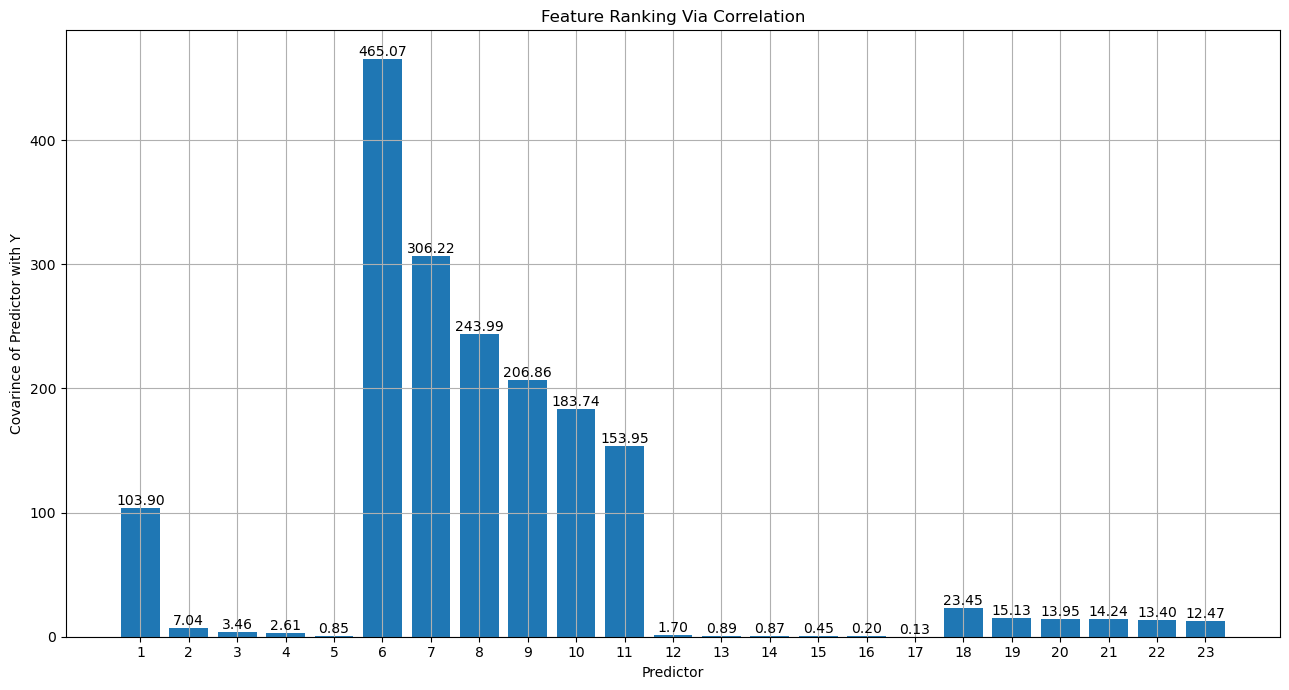

In [323]:
#Feature Ranking Via Correlation
feature_scores = np.empty((23))

for i in range(0,23):

    column = X[:,i+1]
    column = np.reshape(column,(30000,1))
    response = np.reshape(Y,(30000,1))
        
    mean_of_response = np.mean(response)
    mean_of_column = np.mean(column)

    var_of_response = np.var(response)
    var_of_column = np.var(column)

    tilda_column = column - mean_of_column
    tilda_response = response - mean_of_response

    tilda_column_T = np.transpose(column)
    tilda_response_T = np.transpose(response)

    correlation_coeff = (np.dot(tilda_column_T,tilda_response))/\
        (np.sqrt(np.dot(tilda_column_T,tilda_column) + np.dot(tilda_response_T,tilda_response)))
    
    correlation_coeff_scalar = correlation_coeff[0,0]
    
    feature_scores[i] = np.square(correlation_coeff_scalar)
    
# Create an index array
index_array = np.arange(1,24)

# Plot the data
plt.figure(figsize=(13, 7))
plt.bar(index_array, feature_scores)
plt.xlabel('Predictor')
plt.ylabel('Covarince of Predictor with Y')
plt.title('Feature Ranking Via Correlation')

plt.xticks(index_array)

for i, value in enumerate(feature_scores,start=1):
    if value > 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
    elif value < 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top')

plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
def newton_raphson(Y_vector,X_matrix,Beta_vector):

    error = 0.001
    ones = np.ones(X_matrix.shape[0])
    ones = np.reshape(ones,(X_matrix.shape[0],1))
    Beta_new = Beta_vector
    Beta_old = Beta_vector
    
    max_iteration = 20
    count = 0
    
    while count != max_iteration:
        
        # Calculate Pi_vector
        #Pi_vector = np.exp(np.dot(X_matrix, Beta)) / (1 + np.exp(np.dot(X_matrix, Beta)))
        Pi_vector = 1/ (1 + np.exp(-np.dot(X_matrix, Beta_old)))
        Pi_complement = ones - Pi_vector
        
        # Update W_matrix
        W_matrix = np.eye(X_matrix.shape[0])
        diagonal_indices = np.diag_indices_from(W_matrix)
        diagonal_values = np.multiply(Pi_vector, Pi_complement)
        diagonal_values = diagonal_values.flatten()
        W_matrix[diagonal_indices] = diagonal_values
        
        # Update Beta_new using Newton-Raphson update rule
        X_t = np.transpose(X_matrix) 
        A = np.dot(np.dot(X_t, W_matrix), X_matrix)
        A_inv = np.linalg.inv(A)
        
        Beta_new = Beta_old + np.dot(np.dot(A_inv, X_t), (Y_vector - Pi_vector))
        
        if np.linalg.norm(Beta_new - Beta_old) < error:
            break

        Beta_old = Beta_new
        count += 1

    print(count)
    return Beta_new


In [55]:
def gradient_descent(Y_vector,X_matrix,Beta_vector,max_iteration):

    learning_rate = 0.01
    error = 0.001
    Beta_new = Beta_vector
    Beta_old = Beta_vector

    X_t = np.transpose(X_matrix)
    
    count = 0

    while count != max_iteration:

        # Calculate Pi_vector
        Pi_vector = 1/ (1 + np.exp(-np.dot(X_matrix, Beta_old)))

        Beta_new = Beta_old - learning_rate*np.dot(X_t,(Y_vector - Pi_vector))

        if np.linalg.norm(Beta_new - Beta_old) < error:
            break

        Beta_old = Beta_new
        count += 1

    else:
        print("Warning: Maximum iterations reached without convergence.")
    
    print(count)
    return Beta_new

In [57]:
result = newton_raphson(Y,X,Beta)
print(result)

5
[[-1.46565367]
 [-0.09890296]
 [-0.05314444]
 [-0.0802848 ]
 [-0.0805674 ]
 [ 0.06839281]
 [ 0.64887994]
 [ 0.09915215]
 [ 0.08634176]
 [ 0.02792574]
 [ 0.03854232]
 [ 0.00924346]
 [-0.40442837]
 [ 0.16770513]
 [ 0.09467116]
 [-0.01171652]
 [ 0.03741806]
 [ 0.02345199]
 [-0.22577926]
 [-0.2215509 ]
 [-0.04827258]
 [-0.06303141]
 [-0.05058702]
 [-0.03669309]]


In [171]:
y_prob_own = np.dot(X,result)

min_value = np.min(y_prob_own)
max_value = np.max(y_prob_own)

scaled_data = (y_prob_own - min_value) / (max_value - min_value)

y_hat = np.empty((X.shape[0],1))
    
for i in range(X.shape[0]):
        
    if scaled_data[i,0] > 0.6:
        y_hat[i,0] = 1
    else:
        y_hat[i,0] = 0

TP = 0
TN = 0
FP = 0
FN = 0
for i in range(X.shape[0]):
    if (y_hat[i,0] == Y[i,0]) and (y_hat[i,0] == 1 and Y[i,0] == 1):
        TP += 1
    elif (y_hat[i,0] == Y[i,0]) and (y_hat[i,0] == 0 and Y[i,0] == 0):
        TN += 1
    elif (y_hat[i,0] != Y[i,0]) and (y_hat[i,0] == 0 and Y[i,0] == 1):
        FP += 1
    elif (y_hat[i,0] != Y[i,0]) and (y_hat[i,0] == 1 and Y[i,0] == 0):
        FN += 1

print("TP:",TP,"TN:",TN,"FP:",FP,"FN:", FN)

TP: 6636 TN: 5 FP: 0 FN: 23359


In [173]:
precision = TP/(TP + FP)
recall  = TP/(TP + FN)
f1_score = 2*((precision*recall)/(precision+recall))
print(f1_score)

0.3623160710873304


In [231]:
def matrix_generator(main_design_matrix,main_response_vector):
    
    #number of row
    n = int(input("Enter row size: "))
    
    #whether to take whole main matrix or not
    matrix_bool = int(input("All features?(Yes:1/No:0): "))

    if matrix_bool != 1:     
        p = input("Enter predictor numbers: ") 
        index_lst = p.split(",")
        int_lst  = [int(num) for num in index_lst]
    else:
        int_lst = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
        
    print(int_lst)
    Beta = np.zeros((len(int_lst)+1,1))

    ones = np.ones(n)
    ones = np.reshape(ones,(n,1))

    X = ones

    for i in range(len(int_lst)):
        
        normalized_colum = normalize(main_design_matrix[0:n,int_lst[i-1]])
        X = np.column_stack((X,normalized_colum))
    
    Y = main_response_vector[0:n]
    Y = np.reshape(Y,(n,1))
    

    print(Y.shape)
    print(X.shape)
    print(Beta.shape)
    
    return Y,X,Beta

In [235]:
result_custom = newton_raphson(Y_custom,X_custom,Beta_custom)
print(result_custom)

3
[[-1.36714068]
 [-0.20987895]
 [ 0.46095151]
 [ 0.11385255]
 [ 0.08382539]
 [ 0.06190731]
 [ 0.04795721]]


In [249]:
y_prob_own = np.dot(X_custom,result_custom)

min_value = np.min(y_prob_own)
max_value = np.max(y_prob_own)

scaled_data = (y_prob_own - min_value) / (max_value - min_value)

y_hat = np.empty((X_custom.shape[0],1))
    
for i in range(X_custom.shape[0]):
        
    if scaled_data[i,0] > 0.4:
        y_hat[i,0] = 1
    else:
        y_hat[i,0] = 0
        
TP_custom = 0
TN_custom = 0
FP_custom = 0
FN_custom = 0

for i in range(X_custom.shape[0]):
    if (y_hat[i,0] == Y_custom[i,0]) and (y_hat[i,0] == 1 and Y_custom[i,0] == 1):
        TP_custom += 1
    elif (y_hat[i,0] == Y_custom[i,0]) and (y_hat[i,0] == 0 and Y_custom[i,0] == 0):
        TN_custom += 1
    elif (y_hat[i,0] != Y_custom[i,0]) and (y_hat[i,0] == 0 and Y_custom[i,0] == 1):
        FP_custom += 1
    elif (y_hat[i,0] != Y_custom[i,0]) and (y_hat[i,0] == 1 and Y_custom[i,0] == 0):
        FN_custom += 1
        
print("TP:",TP_custom,"TN:",TN_custom,"FP:",FP_custom,"FN:", FN_custom)

TP: 2766 TN: 20942 FP: 3870 FN: 2422


In [251]:
precision_custom = TP_custom/(TP_custom + FP_custom)
recall_custom  = TP_custom/(TP_custom + FN_custom)
f1_score_custom = 2*((precision_custom*recall_custom)/(precision_custom+recall_custom))
print(f1_score_custom)

0.4678619756427605
